Mounted at /content/drive
Total image count: 35887
Total training images: 28709
Total testing images: 7178


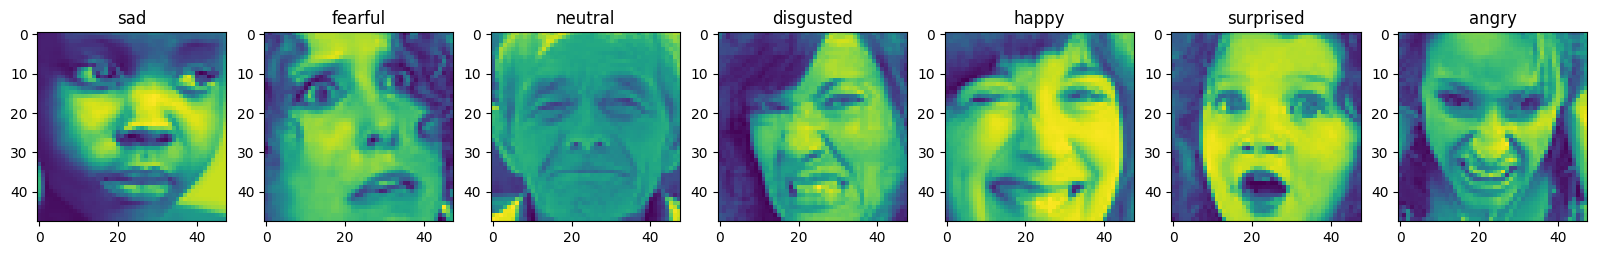

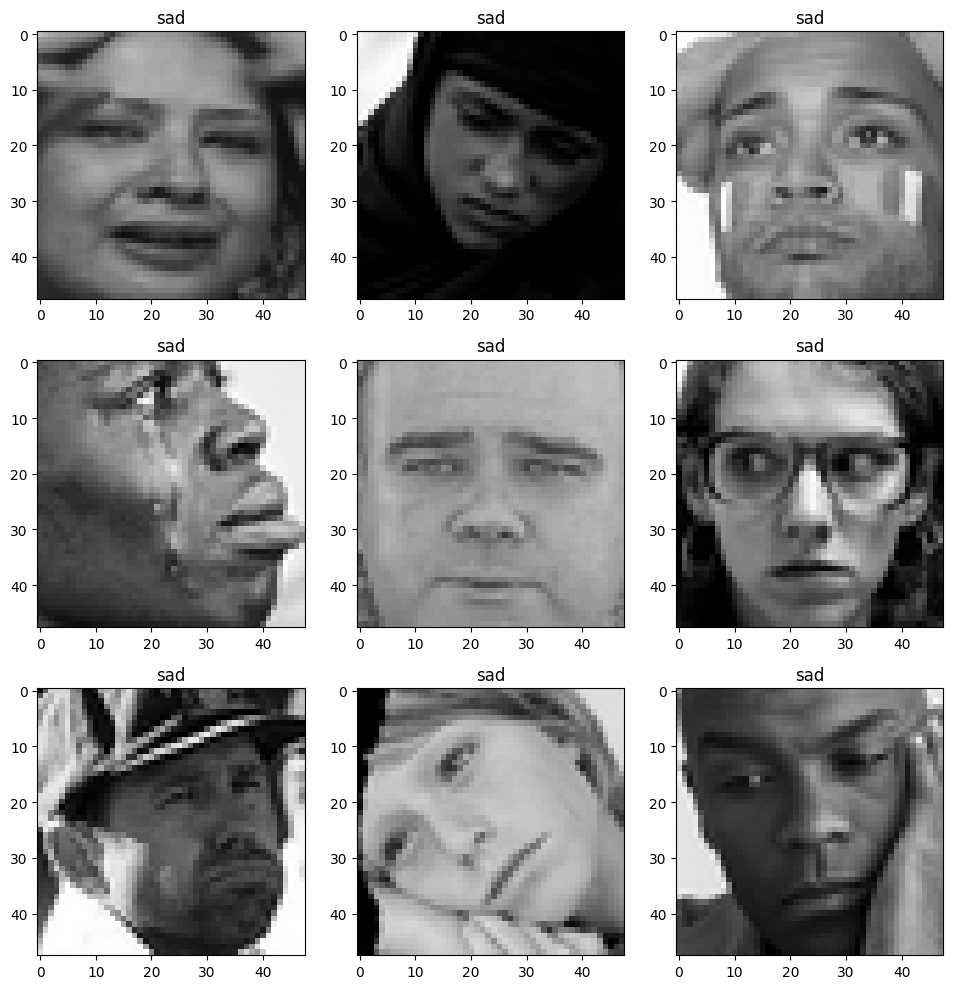

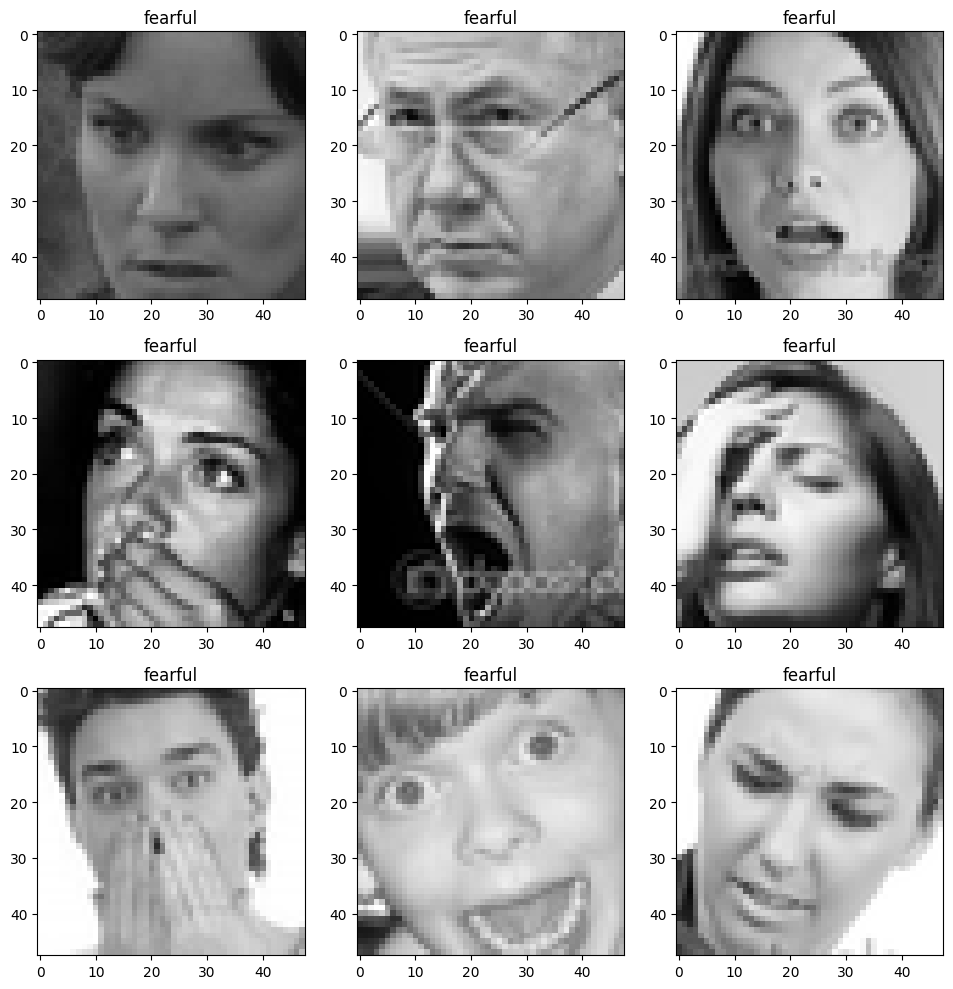

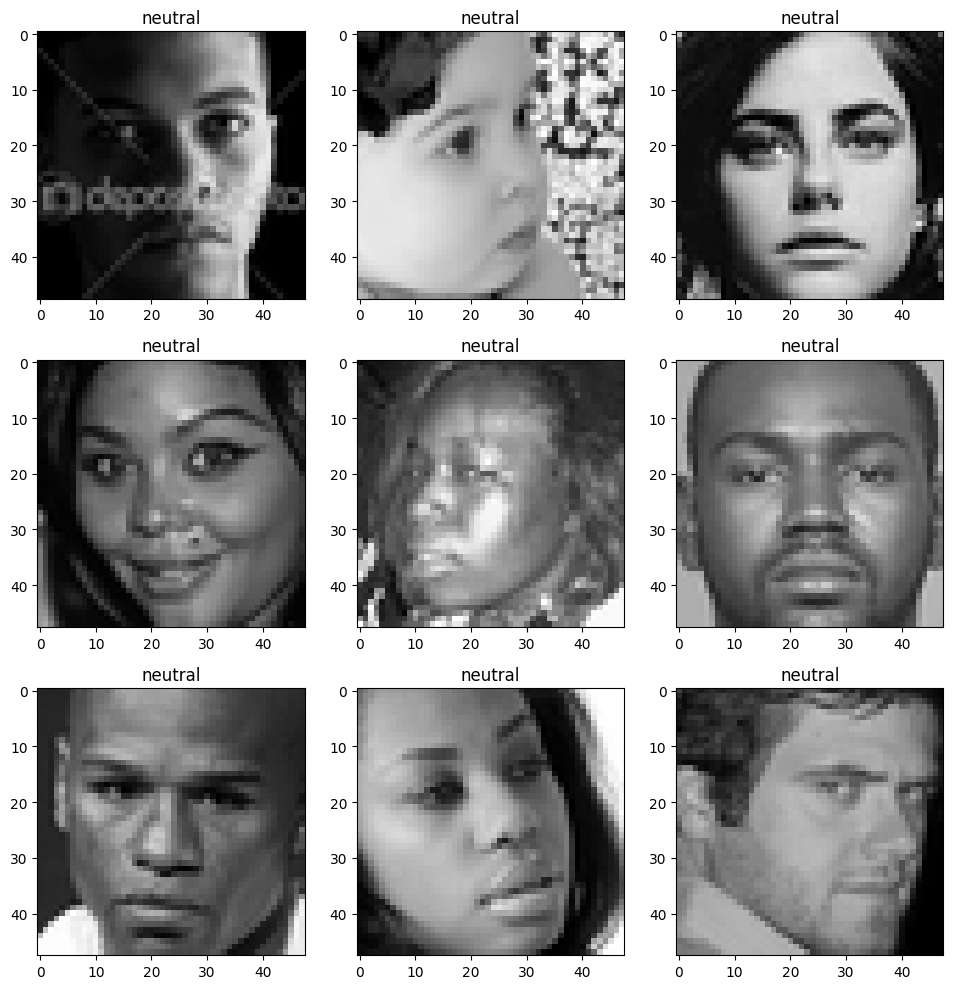

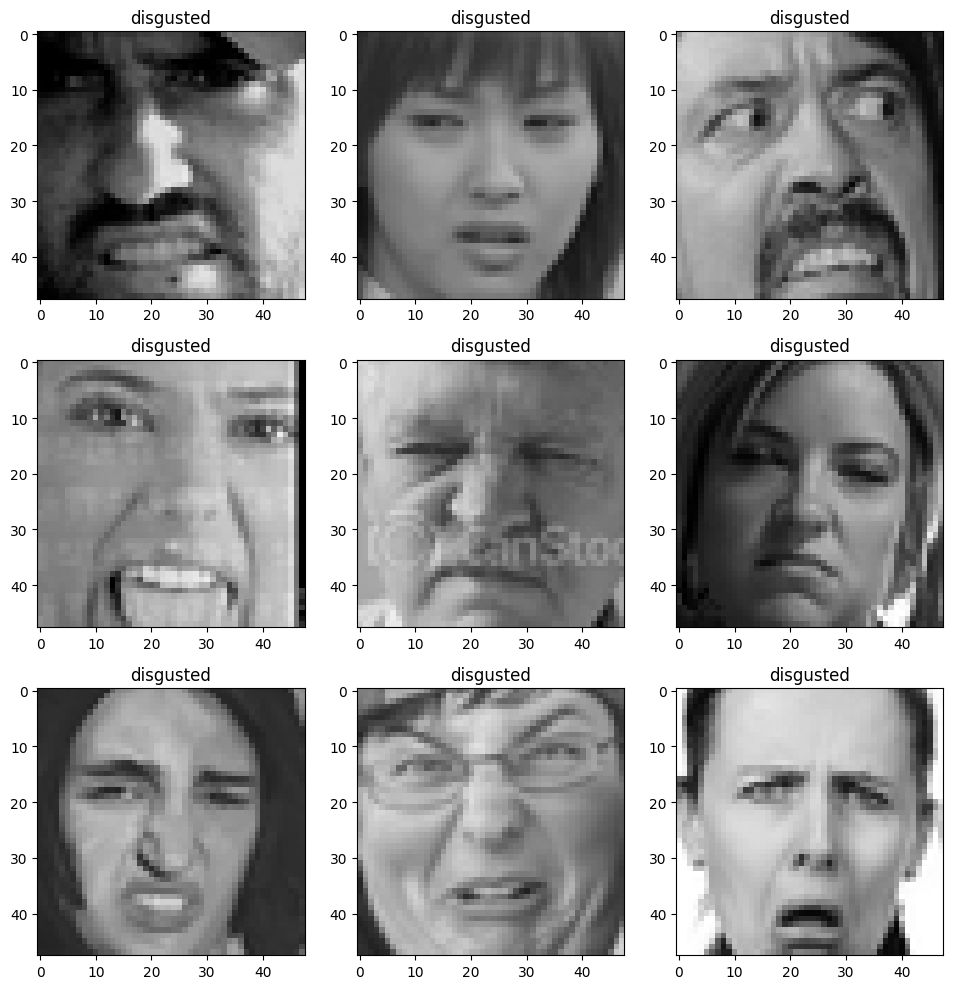

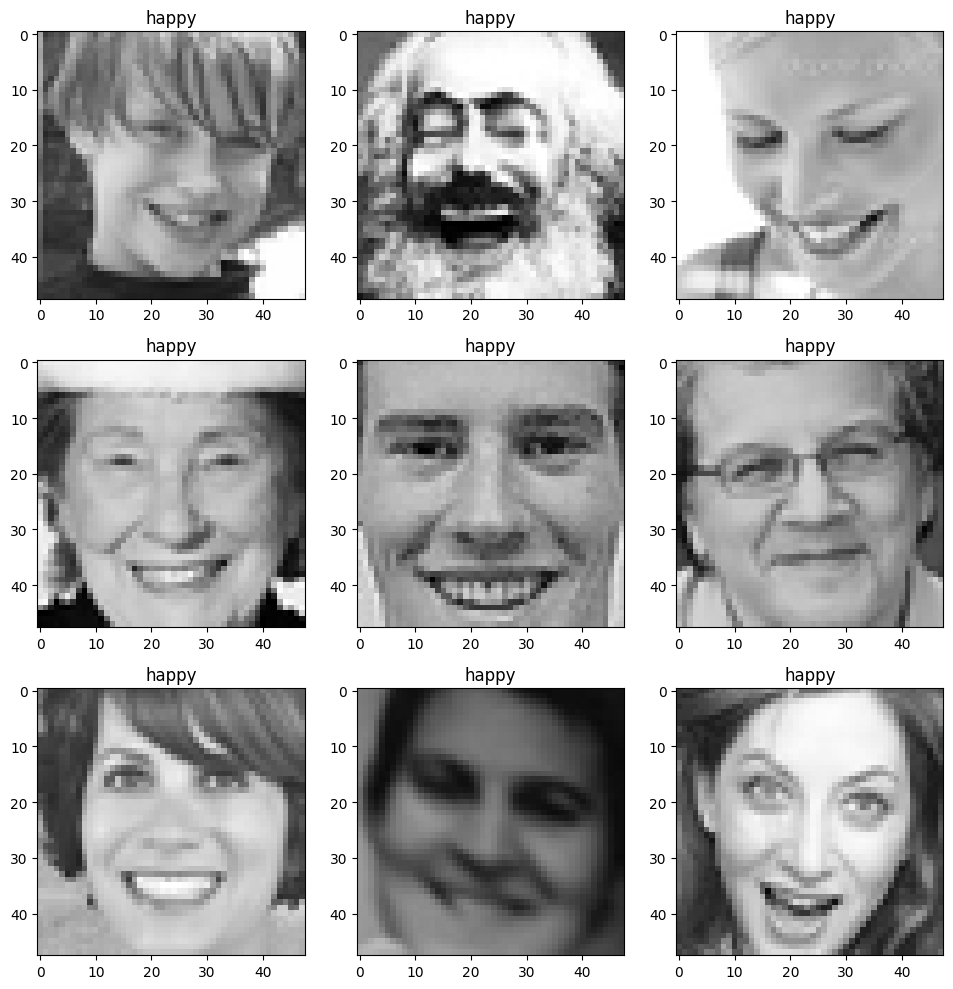

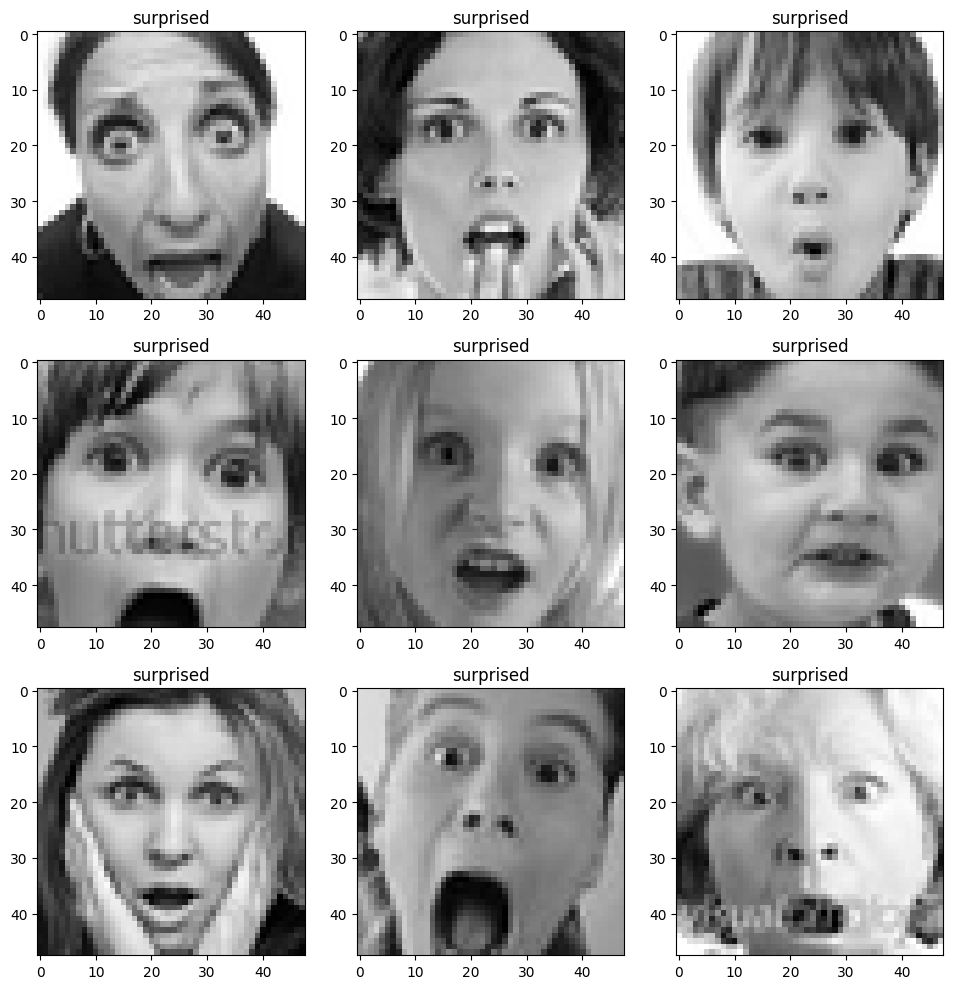

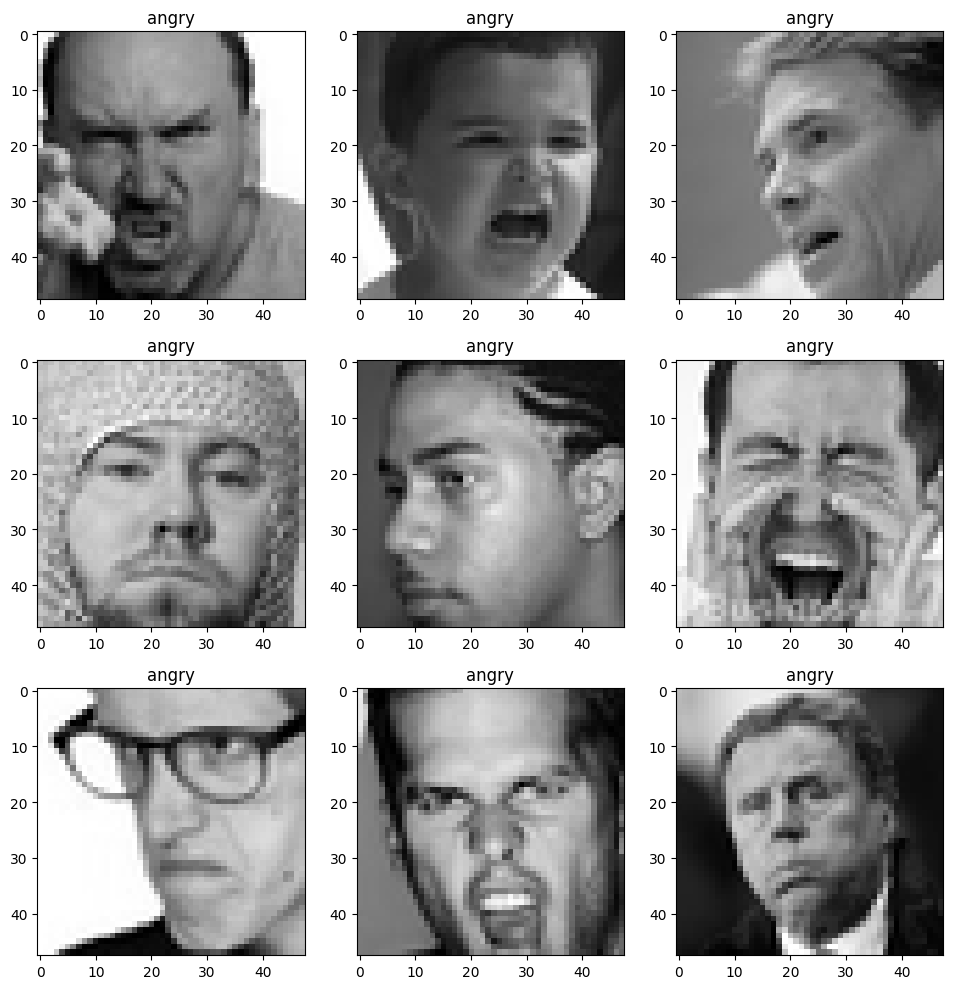

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 9748s 27s/step - accuracy: 0.2449 - loss: 1.8301 - val_accuracy: 0.2513 - val_loss: 1.8107
Epoch 2/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 97s 267ms/step - accuracy: 0.2530 - loss: 1.8141 - val_accuracy: 0.2513 - val_loss: 1.8111
Epoch 3/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 142s 267ms/step - accuracy: 0.2536 - loss: 1.8093 - val_accuracy: 0.2513 - val_loss: 1.8114
Epoch 4/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 97s 267ms/step - accuracy: 0.2490 - loss: 1.8152 - val_accuracy: 0.2513 - val_loss: 1.8108
Epoch 5/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 143s 270ms/step - accuracy: 0.2461 - loss: 1.8186 - val_accuracy: 0.2513 - val_loss: 1.8110
Epoch 6/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 139s 263ms/step - accuracy: 0.2556 - loss: 1.8102 - val_accuracy: 0.2513 - val_loss: 1.8112
Epoch 7/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 144s 268ms/step - accuracy: 0.2473 - loss: 1.8164 - val_accuracy: 0.2513 - val_loss: 1.8135
Epoch 8/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 97s 268ms/step - accuracy: 0.2502 - loss: 1.8130 -

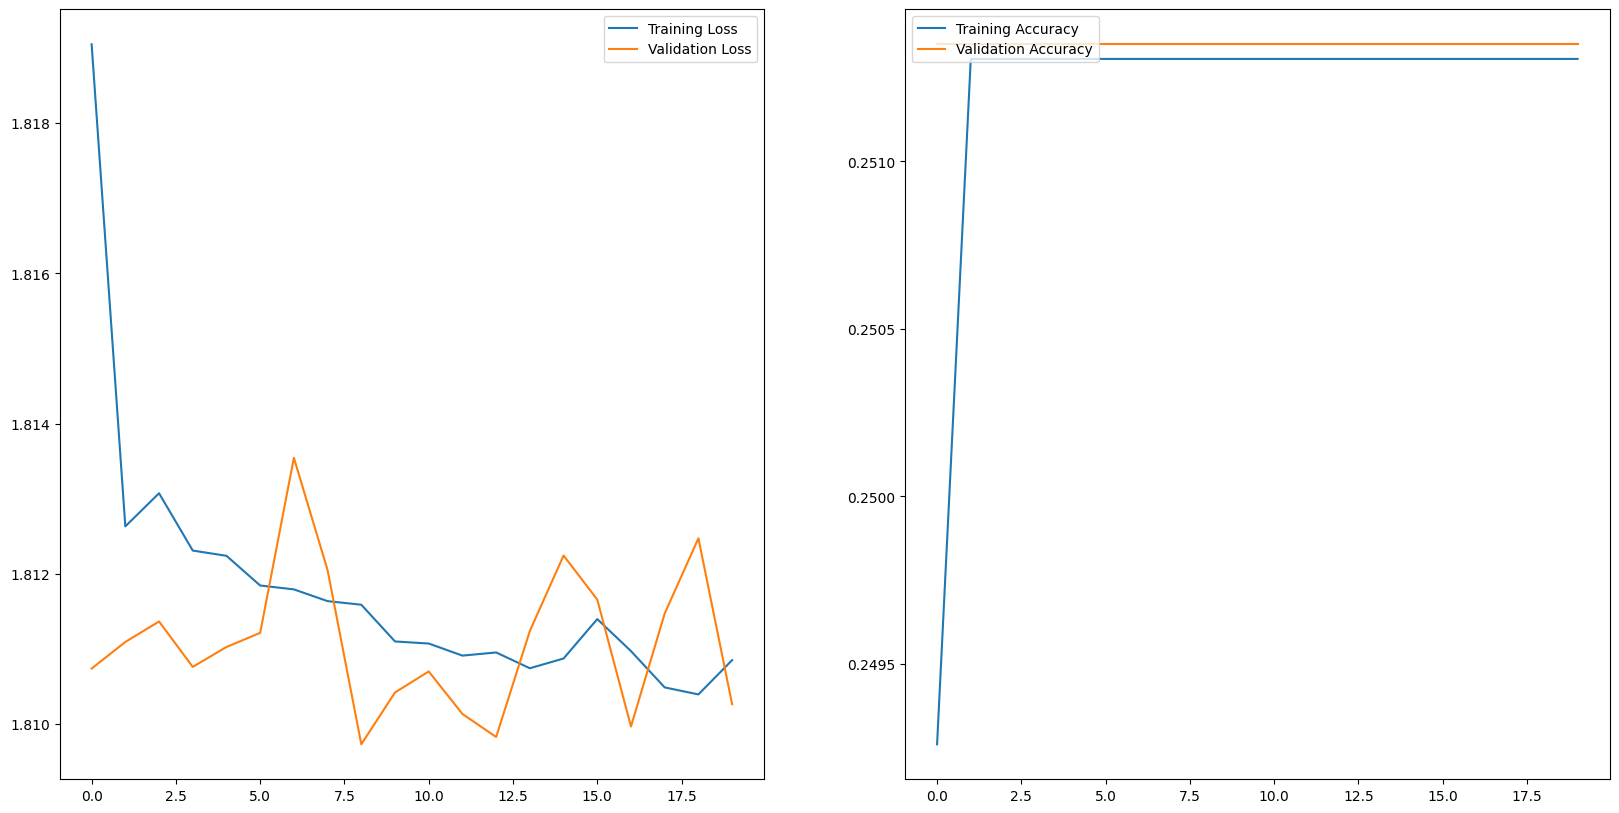

ValueError: The filename must end in `.weights.h5`. Received: filepath=/content/drive/MyDrive/IA_ProyectoAgosto/modelos/model_2_weights.h5

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from PIL import Image
from keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

root_dir = '/content/drive/MyDrive/IA_ProyectoAgosto/emociones'
train_dir = os.path.join(root_dir, 'train')
test_dir = os.path.join(root_dir, 'test')

labels = os.listdir(train_dir)
target_var = labels

# Contar imágenes en cada conjunto, incluyendo .png, .jpg, .jpeg
def count_images(directory):
    image_count = 0
    for extension in ['*.png', '*.jpg', '*.jpeg']:
        image_count += len(list(pathlib.Path(directory).rglob(extension)))  # Use rglob for recursive search
    return image_count

try:
    print('Total image count:', count_images(root_dir))
    print('Total training images:', count_images(train_dir))
    print('Total testing images:', count_images(test_dir))
except OSError as e:
    print(f"Error accessing files: {e}")
    print("Please check your Google Drive sync, file permissions, and network connectivity.")


# Visualización de ejemplos
fig, axes = plt.subplots(1, 7, figsize=(20,8))
for i, label in enumerate(target_var):
    img_path = os.path.join(train_dir, label, os.listdir(os.path.join(train_dir, label))[0])
    axes[i].imshow(plt.imread(img_path))
    axes[i].set_title(label)
plt.show()

# Función para mostrar imágenes por emoción
def display_images(emotion):
    plt.figure(figsize=(10,10))
    for i in range(1, 10):
        plt.subplot(3, 3, i)
        img_path = os.path.join(train_dir, emotion, os.listdir(os.path.join(train_dir, emotion))[i])
        img = image.load_img(img_path, target_size=(48, 48))
        plt.title(emotion)
        plt.imshow(img)
        plt.tight_layout()
    plt.show()

for emotion in target_var:
    display_images(emotion)

# Generación de datos de entrenamiento y validación
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train = train_datagen.flow_from_directory(train_dir,
                                          subset='training',
                                          color_mode='grayscale',
                                          target_size=(48, 48),
                                          batch_size=64,
                                          shuffle=True,
                                          class_mode='categorical')
valid = train_datagen.flow_from_directory(train_dir,
                                          subset='validation',
                                          color_mode='grayscale',
                                          target_size=(48, 48),
                                          batch_size=64,
                                          shuffle=True,
                                          class_mode='categorical')
test = test_datagen.flow_from_directory(test_dir,
                                        color_mode='grayscale',
                                        target_size=(48, 48),
                                        batch_size=64,
                                        shuffle=False,
                                        class_mode='categorical')

# Modelo de red neuronal
model = Sequential([
    layers.Rescaling(1./255, input_shape=(48, 48, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(target_var), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento
epochs = 20
history = model.fit(train, validation_data=valid, epochs=epochs)

# Visualización de resultados
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

# Guardar modelo y pesos
model.save('/content/drive/MyDrive/IA_ProyectoAgosto/modelos/model_2.h5')
model.save_weights('/content/drive/MyDrive/IA_ProyectoAgosto/modelos/model_2_weights.h5')


In [5]:
# Guardar modelo y pesos
model.save('/content/drive/MyDrive/IA_ProyectoAgosto/modelos/model_2.h5')
model.save_weights('/content/drive/MyDrive/IA_ProyectoAgosto/modelos/model_2_weights.weights.h5') # Change the filename to end with .weights.h5

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from PIL import Image
from keras.preprocessing import image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

import pathlib

#root_dir = 'C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions'

from google.colab import drive
drive.mount('/content/drive')



root_dir = '/content/drive/MyDrive/IA_ProyectoAgosto/emociones'

train_dir = root_dir + '/train/'
test_dir = root_dir + '/test/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
labels = os.listdir(train_dir)
target_var = labels

In [ ]:
#counting the images in each dataset

file_count = len(list(pathlib.Path(root_dir).glob('*/*/*.png')))
print('Total image count:', file_count)

file_count = len(list(pathlib.Path(train_dir).glob('*/*.png')))
print('Total training images:', file_count)

file_count = len(list(pathlib.Path(test_dir).glob('*/*.png')))
print('Total testing images:', file_count)

Total image count: 35887
Total training images: 28709
Total testing images: 7178


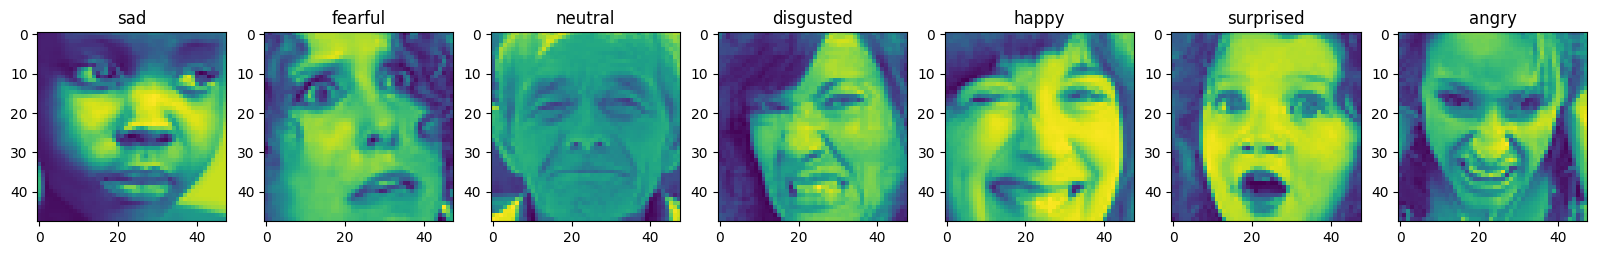

In [ ]:
fig, axes = plt.subplots(1, 7, figsize=(20,8))

for i in range(len(target_var)):
    #d = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[0]
    d = os.path.join(train_dir, target_var[i], os.listdir(os.path.join(train_dir, target_var[i]))[0]) # Use os.path.join for path construction
    axes[i].imshow( plt.imread(d) )
    axes[i].set_title(target_var[i])
plt.show()

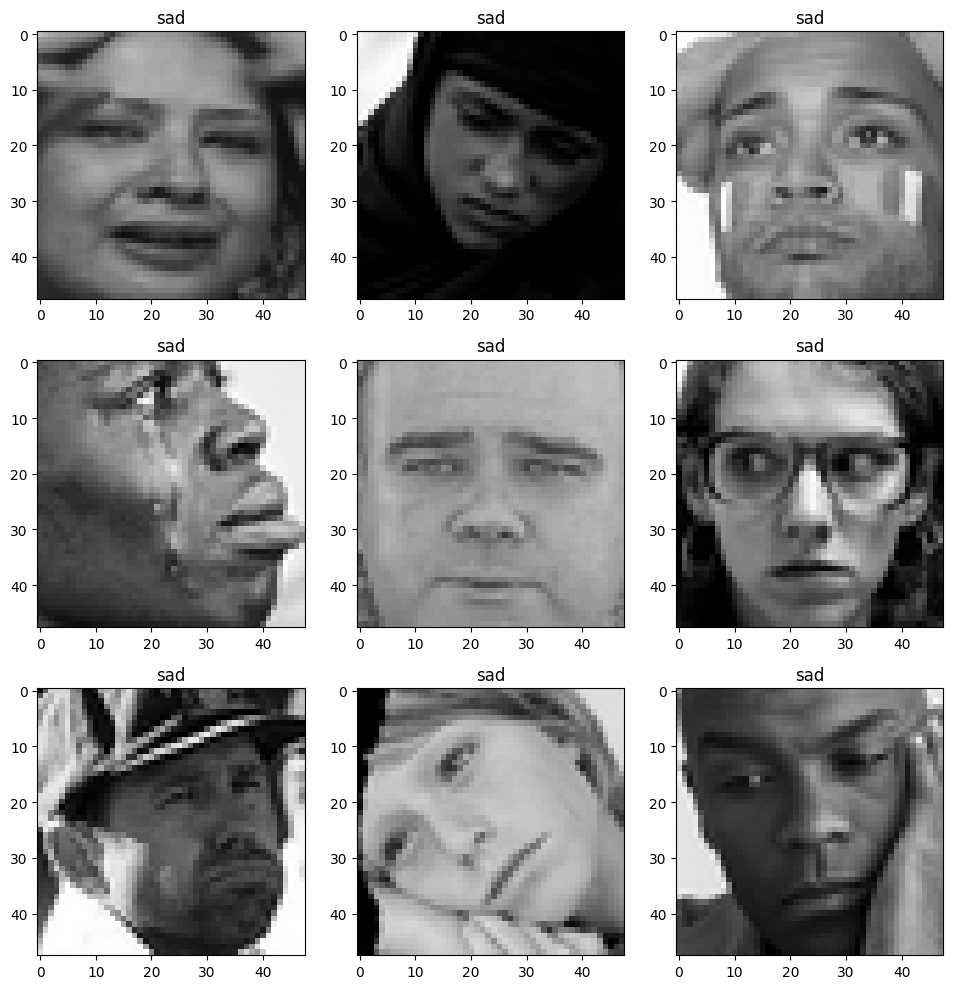

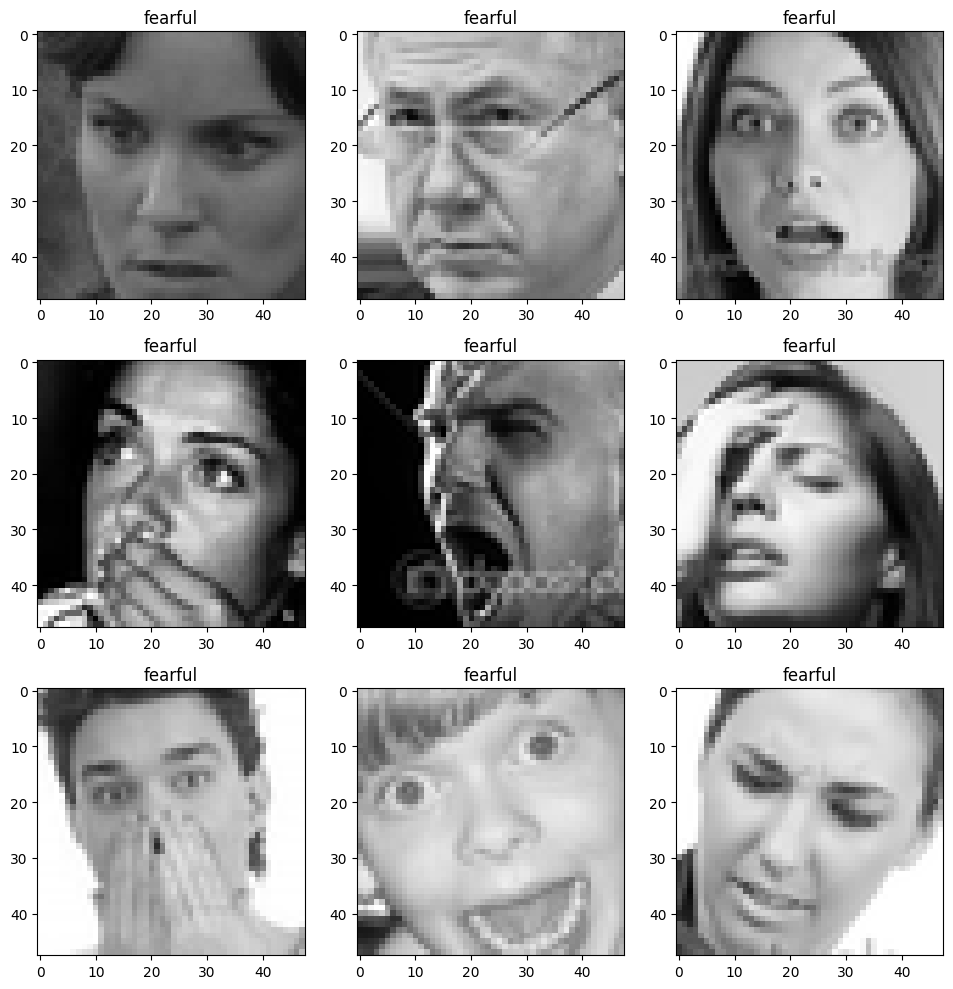

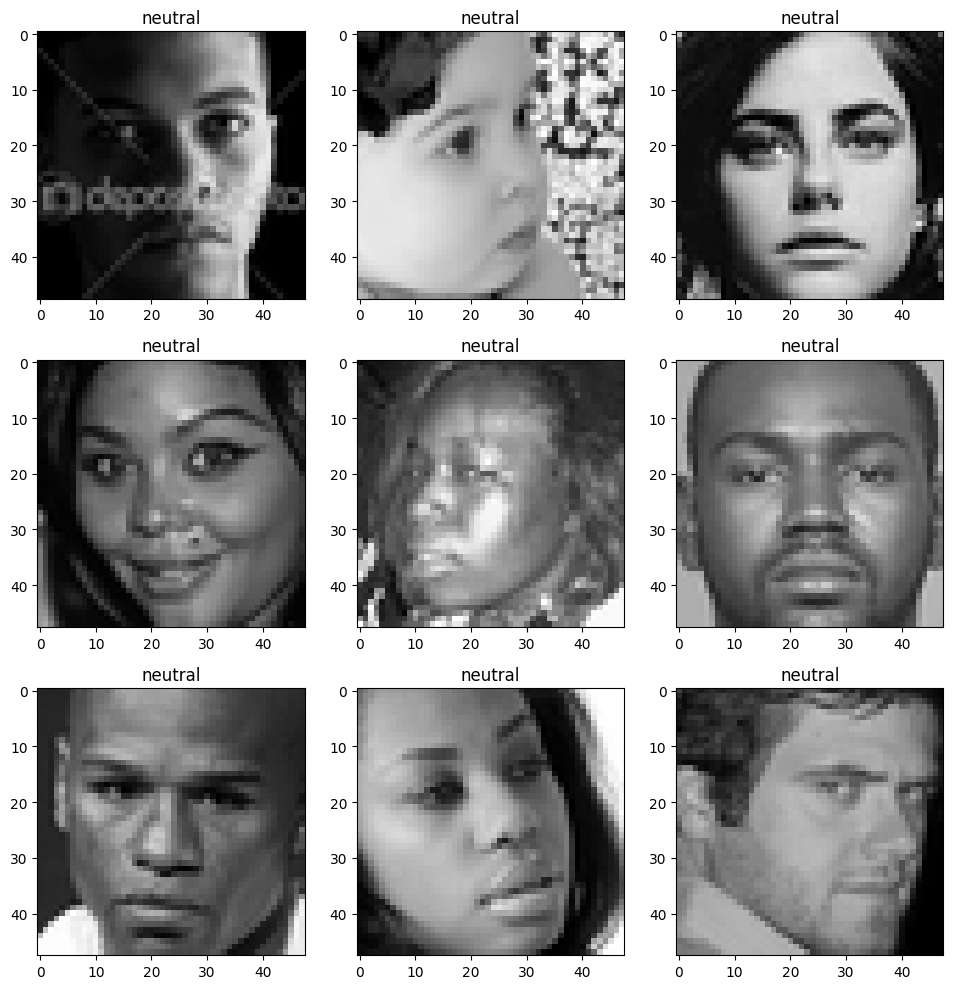

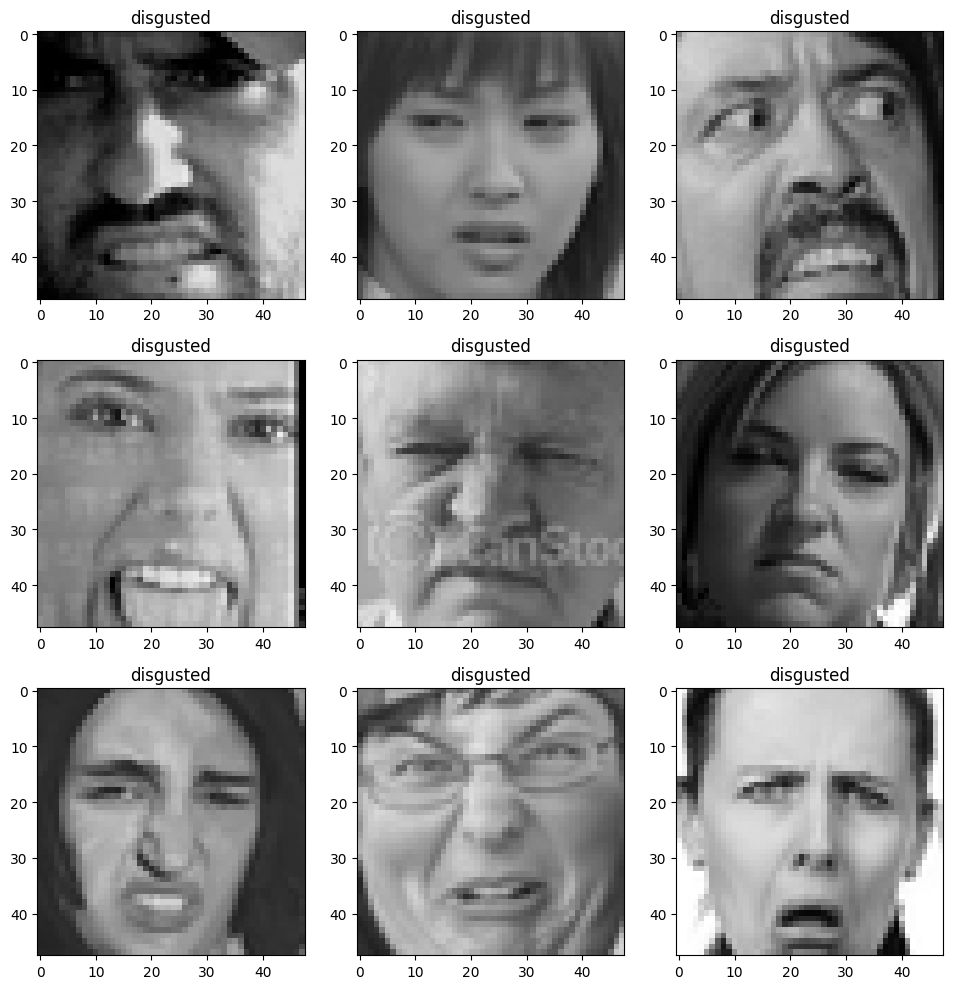

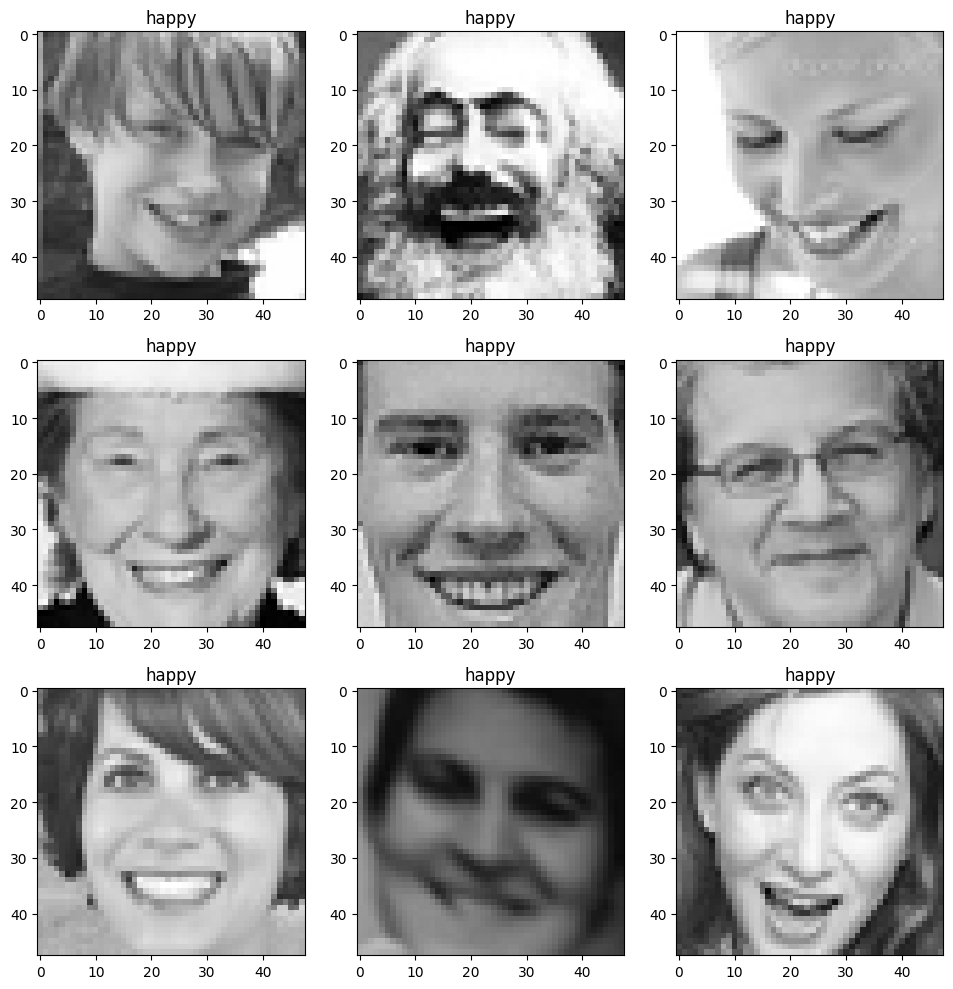

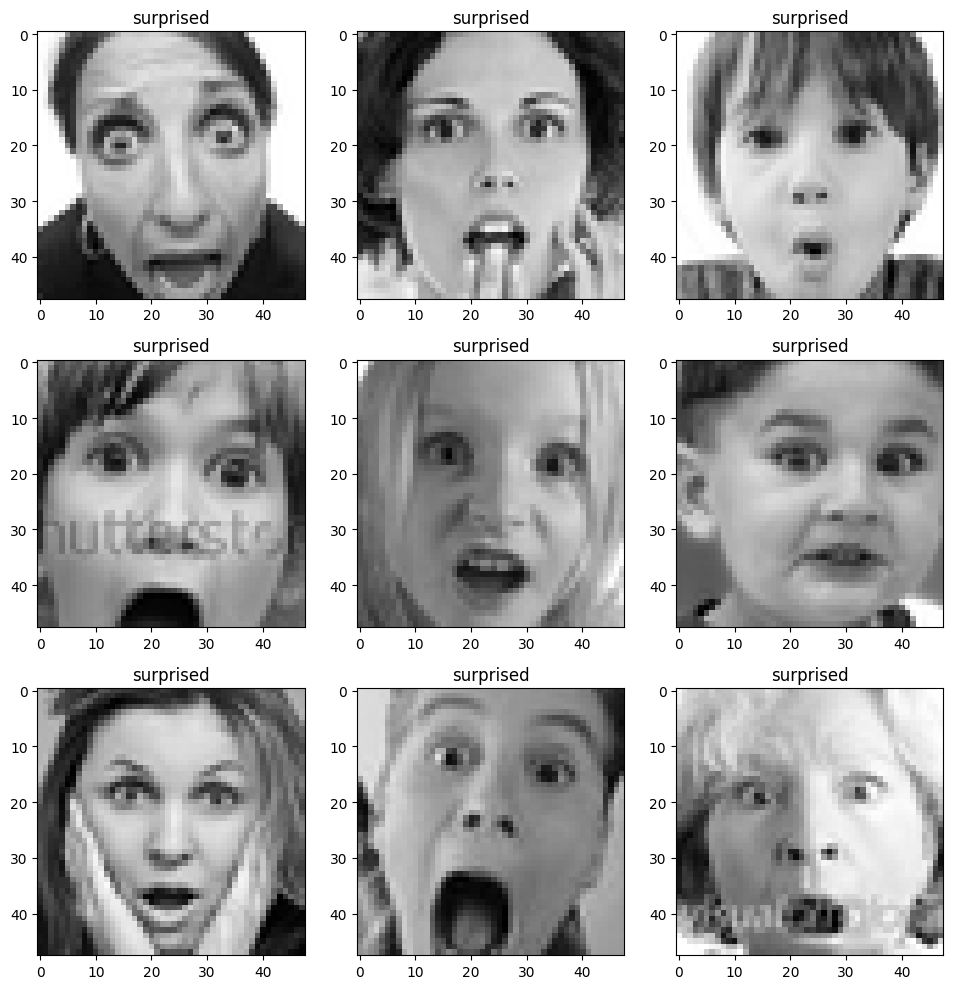

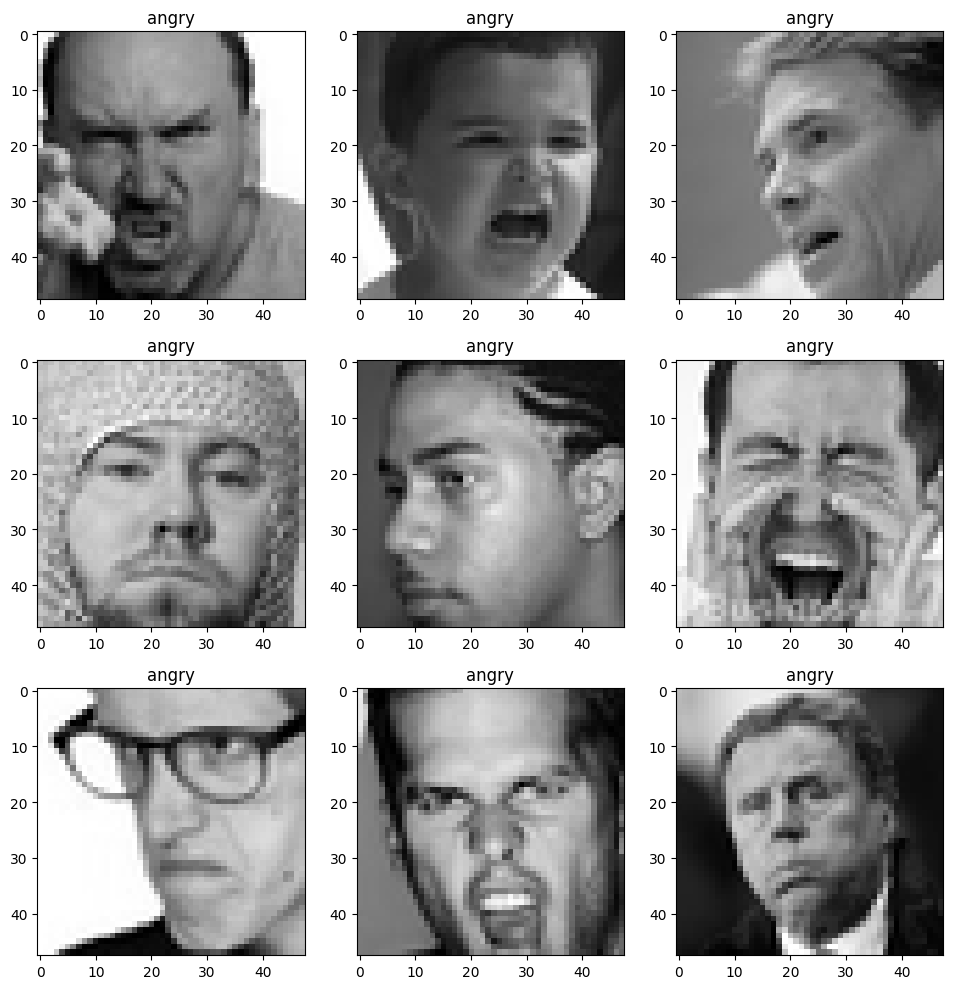

In [ ]:
def display_images(emotion):
    plt.figure(figsize=(10,10))
    for i in range(1, 10, 1):
        plt.subplot(3,3,i) #Form a 3x3 grid for each label
        img = image.load_img(train_dir + '/' + emotion + "/" + os.listdir(train_dir + '/' + emotion)[i], target_size=(48, 48)) #load images
        plt.title(emotion) #display image label
        plt.imshow(img) #display image
        plt.tight_layout() #format images
    plt.show()

for i in os.listdir(train_dir):
    display_images(i)